In [1]:

from google.colab import drive
drive.mount('/content/drive')

#Connect to the Google Drive

Mounted at /content/drive


In [2]:
from google.colab import drive
import os
from torchvision import datasets


# Set the path to your dataset
dataset_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Dataset1/train"

# Create a dictionary to store the number of images per class
class_counts = {}

# Iterate through each class folder
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_path):
        # Count the number of images in the class folder
        num_images = len(os.listdir(class_path))

        # Store the count in the dictionary
        class_counts[class_folder] = num_images

# Print the table header
print("{:<20} {:<20}".format('Class Name', 'Number of Images'))

# Print each class and its corresponding count
for class_name, count in class_counts.items():
    print("{:<20} {:<20}".format(class_name, count))

# Print the total number of images
total_images = sum(class_counts.values())
print("{:<20} {:<20}".format('Total', total_images))


Class Name           Number of Images    
white nail           30                  
terry_s nail         36                  
yellow nails         27                  
splinter hemmorrage  50                  
red lunula           15                  
pale nail            35                  
onycholycis          37                  
Muehrck-e_s lines    33                  
leukonychia          33                  
koilonychia          55                  
Darier_s disease     61                  
bluish nail          53                  
clubbing             49                  
half and half nailes (Lindsay_s nails) 39                  
eczema               49                  
aloperia areata      47                  
beau_s line          60                  
Total                709                 


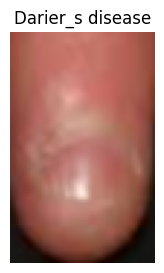

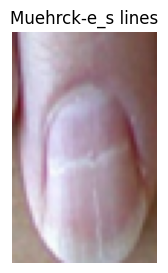

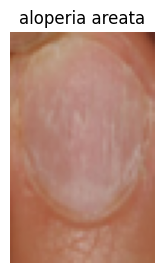

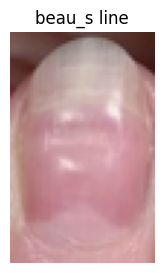

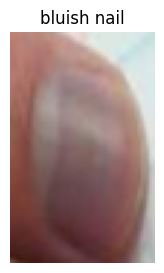

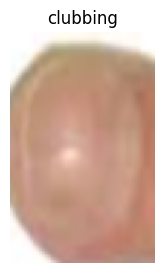

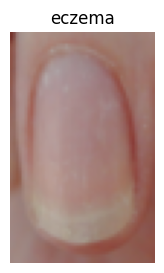

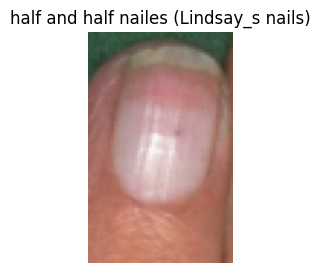

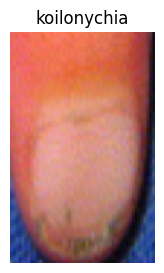

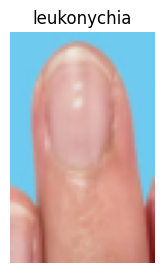

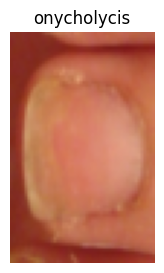

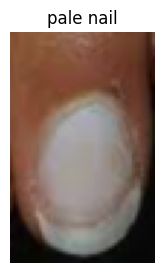

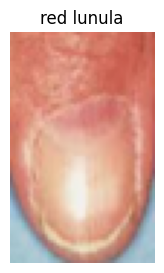

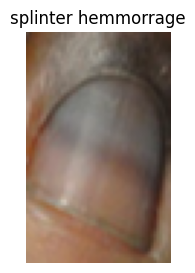

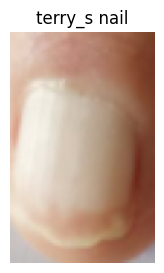

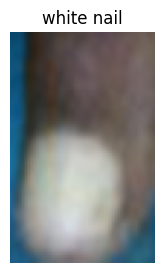

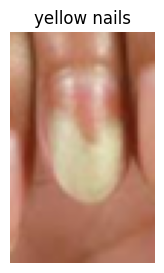

In [3]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Set the path to your dataset
src_path =  "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Dataset1/train"


# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((80, 50)),  # Adjust desired_height and desired_width
    transforms.ToTensor(),
])

# Load the dataset
dataset = ImageFolder(root=src_path, transform=transform)

# Map class names to indices
class_to_idx = {class_name: idx for idx, class_name in enumerate(dataset.classes)}

# Create a dataloader for each class
class_dataloaders = []
for class_name in dataset.classes:
    class_indices = [i for i, label in enumerate(dataset.targets) if dataset.classes[label] == class_name]
    class_dataset = torch.utils.data.Subset(dataset, class_indices)
    class_dataloader = DataLoader(class_dataset, batch_size=1, shuffle=True)
    class_dataloaders.append((class_name, class_dataloader))

# Display one image from each class separately
for class_name, class_dataloader in class_dataloaders:
    fig, axes = plt.subplots(1, 1, figsize=(3, 3))

    # Display one image from the current class
    images, labels = next(iter(class_dataloader))
    image_np = images.numpy().squeeze().transpose((1, 2, 0))

    axes.imshow(image_np)
    axes.set_title(class_name)
    axes.axis('off')

    plt.show()


In [4]:
print(len(dataset))

709


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/40, Loss: 2.7637, Validation Accuracy: 16.90
Epoch 2/40, Loss: 2.5948, Validation Accuracy: 21.13
Epoch 3/40, Loss: 2.3989, Validation Accuracy: 21.13
Epoch 4/40, Loss: 2.2012, Validation Accuracy: 27.46
Epoch 5/40, Loss: 2.0215, Validation Accuracy: 22.54
Epoch 6/40, Loss: 1.8117, Validation Accuracy: 38.73
Epoch 7/40, Loss: 1.6773, Validation Accuracy: 25.35
Epoch 8/40, Loss: 1.4718, Validation Accuracy: 40.14
Epoch 9/40, Loss: 1.3275, Validation Accuracy: 44.37
Epoch 10/40, Loss: 1.0822, Validation Accuracy: 41.55
Epoch 11/40, Loss: 1.0236, Validation Accuracy: 38.73
Epoch 12/40, Loss: 0.9165, Validation Accuracy: 47.89
Epoch 13/40, Loss: 0.7388, Validation Accuracy: 44.37
Epoch 14/40, Loss: 0.6233, Validation Accuracy: 54.23
Epoch 15/40, Loss: 0.5255, Validation Accuracy: 56.34
Epoch 16/40, Loss: 0.4210, Validation Accuracy: 57.75
Epoch 17/40, Loss: 0.3460, Validation Accuracy: 54.23
Epoch 18/40, Loss: 0.3346, Validation Accuracy: 58.45
Epoch 19/40, Loss: 0.2562, Validation

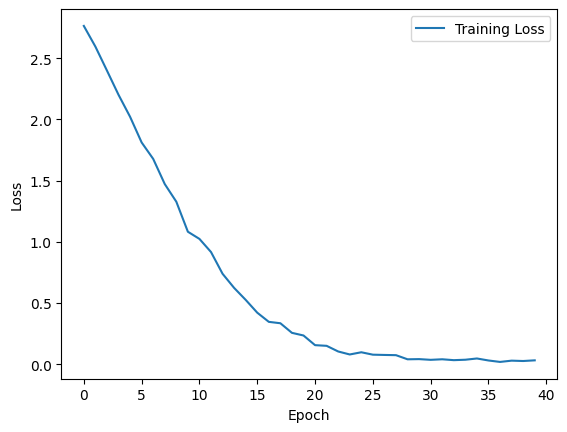

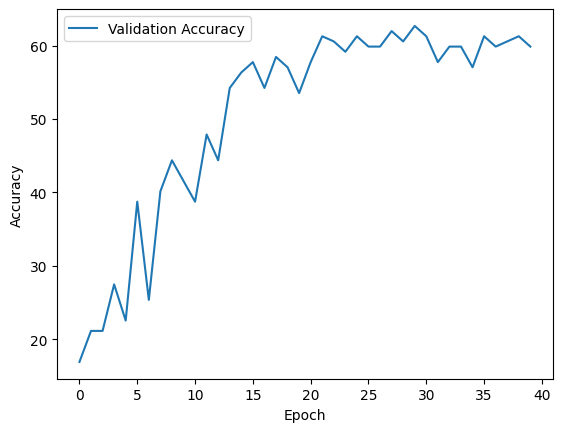

In [20]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define the transformations to resize the images for VGG16
from torchvision import transforms

# Augmentations
train_transform = transforms.Compose([
   # transforms.Grayscale(),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=45),
    transforms.RandomAffine(degrees=0, translate=(0.2, 0.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply augmentations to your dataset
dataset = datasets.ImageFolder(root=src_path, transform=train_transform)


# Load the pre-trained VGG16 model
pretrained_model = models.vgg16(pretrained=True)
# Remove the last fully connected layer of the pre-trained model
pretrained_model = nn.Sequential(*list(pretrained_model.children())[:-1])

# Add your custom fully connected layers for classification
class CustomVGG16Model(nn.Module):
    def __init__(self, num_classes=17):
        super(CustomVGG16Model, self).__init__()
        self.features = pretrained_model
        self.fc1 = nn.Linear(512 * 7 * 7, 256)  # Adjusted input size for VGG16
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Load the dataset and split into training and validation sets
src_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Dataset1/train"
dataset = datasets.ImageFolder(root=src_path, transform=transform)
train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = random_split(dataset, [train_size, len(dataset) - train_size])

# DataLoader for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=True)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomVGG16Model(num_classes=17).to(device)

# # Define your loss function and optimizer
# class_weights = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
# criterion = nn.CrossEntropyLoss(weight=class_weights)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)


# Move class_weights tensor to the same device as the model
#class_weights = torch.tensor([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]).to(device)
class_weights = torch.tensor([1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0]).to(device)

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)



# Training loop
num_epochs = 40 # Increase the number of epochs
training_losses = []
validation_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_losses = []
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())

    avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
    training_losses.append(avg_epoch_loss)

    # Validate the model on the validation set
    model.eval()
    with torch.no_grad():
        val_correct = 0
        val_total = 0
        for val_inputs, val_labels in val_dataloader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()

    val_accuracy = val_correct / val_total * 100
    validation_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {avg_epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}')

# Plot the training losses
plt.plot(training_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the validation accuracies
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
# After your training loop
torch.save(model.state_dict(),"/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/VGG16Model.pth")

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

src_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Dataset1/test"


test_dataset = ImageFolder(root=src_path, transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=False)

model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for test_inputs, test_labels in test_dataloader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        test_outputs = model(test_inputs)
        _, test_predicted = torch.max(test_outputs.data, 1)

        all_predictions.extend(test_predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

# Display misclassified examples
misclassified_indices = [i for i, (pred, label) in enumerate(zip(all_predictions, all_labels)) if pred != label]
print(f"Misclassified examples: {misclassified_indices}")

conf_matrix = confusion_matrix(all_labels, all_predictions)
classification_rep = classification_report(all_labels, all_predictions,digits=4)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Misclassified examples: [13, 26, 34, 38, 41, 42, 43, 44, 45, 46, 47, 48, 66, 107, 115, 123, 124, 125, 126, 146, 147, 157, 158, 159]
Confusion Matrix:
[[16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  1  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  1  0  1  0  0  0  3  0  0  1]
 [ 0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  1  1  7  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  7  1  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0

In [16]:
# from PIL import Image
# import torch
# from torchvision import transforms
# import numpy as np

# # Function to load and preprocess an image
# def preprocess_image(image_path):
#     transform = transforms.Compose([
#         transforms.Resize((224, 224)),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     ])

#     # Load and preprocess the image
#     image = Image.open(image_path).convert("RGB")
#     image = transform(image).unsqueeze(0)  # Add batch dimension
#     return image

# # Function to perform inference on a single image
# def classify_image(model, image_path, class_labels):
#     model.eval()

#     # Load and preprocess the image
#     image = preprocess_image(image_path)

#     # Move image to the same device as the model
#     device = next(model.parameters()).device
#     image = image.to(device)

#     # Perform inference
#     with torch.no_grad():
#         output = model(image)

#     # Get the predicted class index
#     _, predicted = torch.max(output.data, 1)
#     predicted_class = predicted.item()

#     # Map the class index to the corresponding label
#     predicted_label = class_labels[predicted_class]

#     return predicted_label

# # Load the trained model
# model_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/VGG16Model.pth"
# # Load the model architecture
# model = CustomVGG16Model(num_classes=7).to(device)

# # Load the saved state_dict
# model_state_dict = torch.load(model_path)
# model.load_state_dict(model_state_dict)

# # Set the model to evaluation mode
# model.eval()

# # Class labels corresponding to your 7 nail diseases
# class_labels = ["aloperia areata", "beau_s nail", "bluish nail", "clubbing", "Darier_s disease", "eczema","half and half","koilonychia","leukonychia","Muehrck-e_s lines", "Onycholycis","pale nail","red lunula","splinter hemmorrage","terry_s nail","white nails","yellow nail"]

# # Path to the new image you want to classify
# new_image_path = "/content/drive/MyDrive/4th Year Research Project Practical/Weekly Practical/Dataset1/NewData/nail.jpg"

# # Perform inference
# predicted_disease = classify_image(model, new_image_path, class_labels)

# # Display the result
# print(f"The predicted disease for the given image is: {predicted_disease}")

